<a href="https://colab.research.google.com/github/taylan-sen/CIS355_FALL05/blob/main/Ideal_Partner%2C_Wife%2C_Secretary%2C_Match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Randomized Algorithms

**Randomized Algorithms** : Randomization is used at some point in order to make the algorithm simpler, or more space or time efficient.

<img src="https://www.cotedazur.de/images/Casino-de-Monte-Carlo.jpg">
Casino de Monte Carlo

**Monte Carlo algorithm**
* used when an analytical solution is too tough, but simulation is easy
* used when speed is important i.e. you have fixed time
* used when you don't need the ***optimal*** solution, just a *good* chance of getting a *good* solution.

## Exercises

1. Monte Calro estimation of Pi
1. Randomized algorithm with grid search/brute force to find the ideal paramter to solve the "Soul Mate" problem.




In [1]:
import random
random.seed(66)
print(random.random())

0.0708089270590726


In [2]:
def in_circle(num_points : int) -> int:
  """ for num_points times:
    - randomly picks a point in a unit square
    - counts the number of points falling in the upper
    right quadrant of a unit circle.
  """
  num_in_circle = 0
  for i in range(num_points):
    x = random.random()
    y = random.random()
    if x**2 + y**2 <= 1:
      num_in_circle += 1
  return num_in_circle

n = 10000000
n_circle = in_circle(n)
print('Pi estimate:', 4*n_circle/n)

Pi estimate: 3.1412456


In [4]:
def find_max(candidates):
  """ Given a list of int, return the max int in list """
  max = candidates[0]
  for i in candidates:
    if i > max:
      max = i
  return max


def select_first_better(target, candidates):

  for i in candidates:
    if i > target:
      break
  return i

def eval_success(population : int, num_sims_each : int):
  """ trying different numbers for num_dates, from 0 to population - 1,
        runs num_sims_each shuffles of the numbers 0 to population - 1, and counts the number of times the second largest number has an index larger than or equal to i.
  """
  success_table = []
  for num_dates in range(1, population):
    successes = 0
    for sim in range(num_sims_each):
      order = list(range(population))
      random.shuffle(order)
      first_group = order[0:num_dates]
      second_group = order[num_dates:]
      best_in_first_group = find_max(first_group)
      selected_mate = select_first_better(best_in_first_group, second_group)
      if selected_mate == population -1:
        successes += 1
    success_table.append(successes)
  return success_table

population = 20
num_sims_each = 1000
y = eval_success(population, num_sims_each)


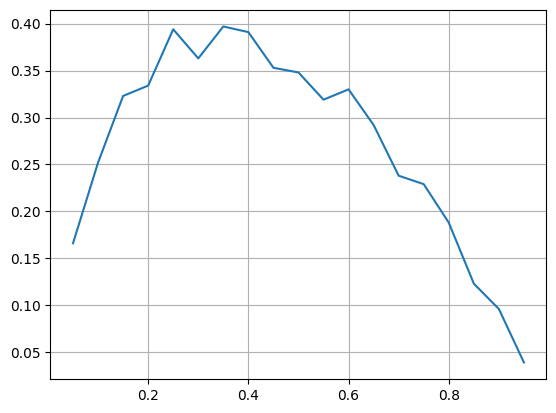

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = list(range(1, population))
plt.plot(np.array(x)/population, np.array(y)/num_sims_each)
plt.grid(True)
plt.show()

In [ ]:
a = list(range(20))
random.shuffle(a)